<a href="https://colab.research.google.com/github/lucapqg/Tutorials-Data-Science/blob/main/Outliers/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Como detectar e tratar outliers com python**


---






O tratamento dos dados é algo muito importante para se fazer qualquer análise. Dessa forma um dos principais coadjuvantes como vilão de qualquer analise se chama outlier.

Neste artigo iremos destrinchar um pouco sobre as características de outliers, algumas técnicas para identificá-los e tratá-los.

>**O que são outliers**

Outliers são dados discrepantes em relação a um conjunto de dados. Este tipo de dado pode trazer distorções em nossas análises.
Esses dados discrepantes podem ser classificados como univariado ou multivariado e artificial ou natural.

***Univariado e multivariado***
Outlier univariado se refere a um dado discrepante em uma distribuição simples como a contagem de gols de vários times de futebol, por exemplo.

<img src='https://miro.medium.com/max/258/1*HXixjQsFiO_Z7SsM48HWdg.png' img>

Neste exemplo podemos observar que o Barcelona possuí um registro muito discrepante em relação aos demais.

Já os outliers multivariados são valores discrepantes dentro de um espaço multidimensional como uma série temporal onde existem 2 variáveis que determinam a posição do valor no espaço.

<img src='https://miro.medium.com/max/425/1*y2QU4sEXOGEoTg1GpEpuqQ.png' img>



***Artificiais e naturais***

Os outliers ainda podem ser artificiais ou naturais.

Artificiais quando os dados discrepantes são frutos de falhas de medição, inferências erradas, ou falhas de processamento do dado.

Já outliers naturais ocorrem quando o dado é somente uma exceção atípica e discrepante em relação conjunto de observações.


>**Mas como os outliers podem nos atrapalhar?**

Digamos que tenhamos uma distribuição simples dado pelos números: 30, 25, 28, 31, 24 e 103.

Certo, agora vamos tirar algumas conclusões estatísticas desta distribuição como a média, o desvio padrão e o coeficiente de variação.

Calculando os valores do desvio padrão e da média, temos respectivamente os valores iguais a 28.2 e 40.16.

<img src='https://miro.medium.com/max/424/1*0X9MDUBK6K1uRbyriJu_9w.png' img>

Podemos notar que o desvio padrão possui um valor muito alto em relação a nossa média.
Analisando o coeficiente de variação definido pela razão entre o desvio padrão e a média, obtemos um resultado igual a aproximadamente 0.70, ou 70%. Isso significa que nossa distribuição possui uma característica heterogênea.

<img src='https://miro.medium.com/max/471/1*FrmspFWHlwuPPbtIaJukRg.png' img>



In [51]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore')

##**Detecção de outliers**


Para exemplificarmos os métodos para detecção de outliers iremos usar a base de dados do preços de casas em Boston da biblioteca scikit-learn.


In [52]:
from sklearn.datasets import load_boston

data = load_boston(return_X_y=False)
dfb = pd.DataFrame(data.data, columns=data.feature_names)
dfb.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Plotando o histograma das variáveis dos nossos dados, selecionaremos o dado que mais aparenta ter uma distribuição normal que neste caso será a variável RM.


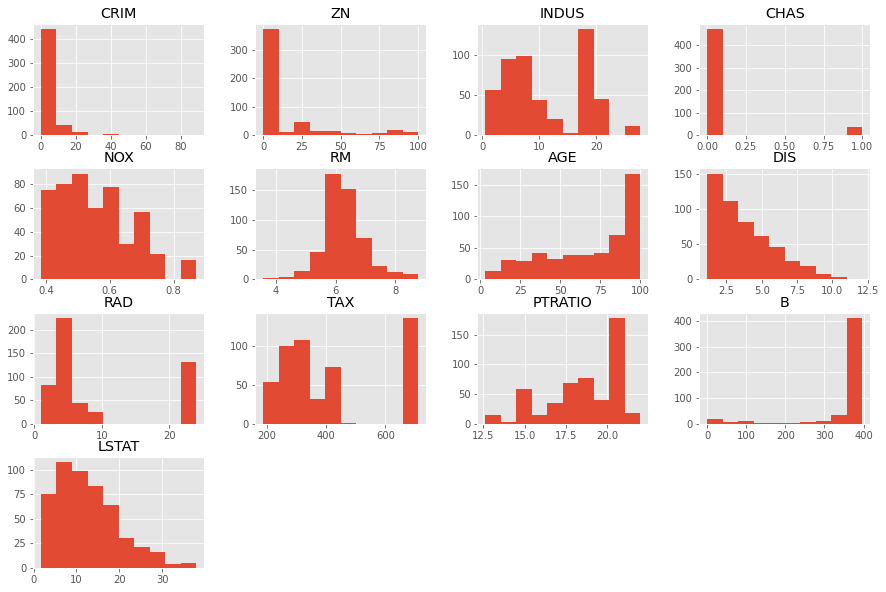

In [54]:
_,ax = plt.subplots(figsize=(15,10))
dfb.hist(ax=ax)
plt.show();

In [55]:
# Descrição
dfb.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


>**Método do desvio padrão**


Desvio padrão é usado como uma medida de dispersão de um conjunto de dados, quanto menor o desvio padrão mais homogêneos são os dados. Isso significa basicamente que quanto maior o desvio padrão mais “espalhados” eles estão.

Outro conceito que devemos ter em mente é sobre o teorema das probabilidades que afirma que quanto maior a amostra, mais a distribuição amostral da sua média aproxima-se de uma distribuição normal.

Ai você pode me perguntar, mas Luca pra que diabos serve isso?







<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/300px-Standard_deviation_diagram.svg.png'>

In [76]:
# Método do desvio 
dt_mean, dt_std = np.mean(dfb['RM']), np.std(dfb['RM'])
cut_off = dt_std * 3
lower, upper = dt_mean - cut_off, dt_mean + cut_off
idx = np.where((dfb['RM'] < lower) | (dfb['RM'] > upper))

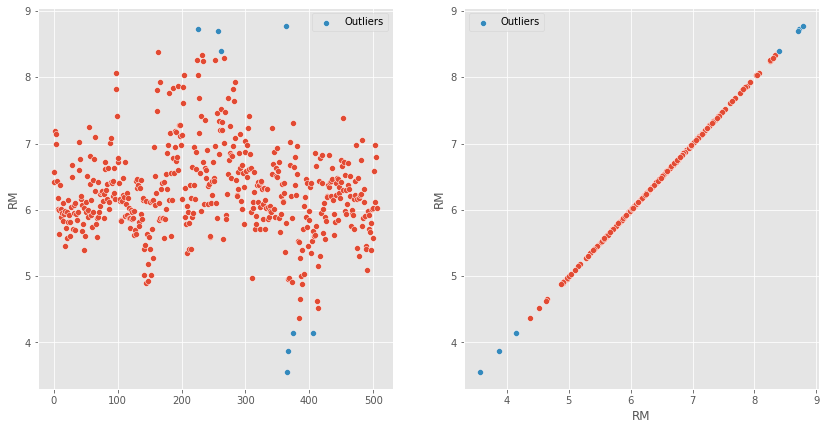

In [78]:
plt.subplots(figsize=(14,7))
plt.subplot(1,2,1)
sns.scatterplot(data = dfb['RM'])
sns.scatterplot(data = dfb['RM'].iloc[idx],label='Outliers')

plt.subplot(1,2,2)
sns.scatterplot(dfb['RM'],dfb['RM'])
sns.scatterplot(dfb['RM'].iloc[idx],dfb['RM'].iloc[idx],label='Outliers')
plt.show();

>**Z score**

O z-score nos diz o quanto cada valor em nossa distribuição se distancia da média em termos de desvio padrão.

In [58]:
# Z score
out = (dfb['RM'] - np.mean(dfb['RM']))/np.std(dfb['RM'])
idx = np.where((out >= 3)|(out <= -3))

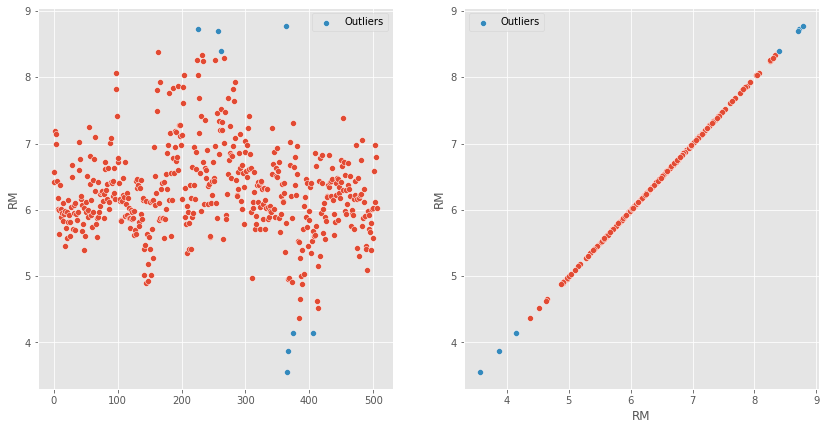

In [79]:
plt.subplots(figsize=(14,7))
plt.subplot(1,2,1)
sns.scatterplot(data = dfb['RM'])
sns.scatterplot(data = dfb['RM'].iloc[idx],label='Outliers')
plt.subplot(1,2,2)
sns.scatterplot(dfb['RM'],dfb['RM'])
sns.scatterplot(dfb['RM'].iloc[idx],dfb['RM'].iloc[idx],label='Outliers')
plt.show();

>**Método do desvio absoluto mediano**

O desvio absoluto mediano de um conjunto de dados é a distância entre cada dado em relação a mediana.

In [81]:
# Método do desvio absoluto mediano
out = (dfb['RM'] - np.median(dfb['RM']))/np.median(np.abs(np.std(dfb['RM'])))
idx = np.where((out >= 3)|(out <= -3))

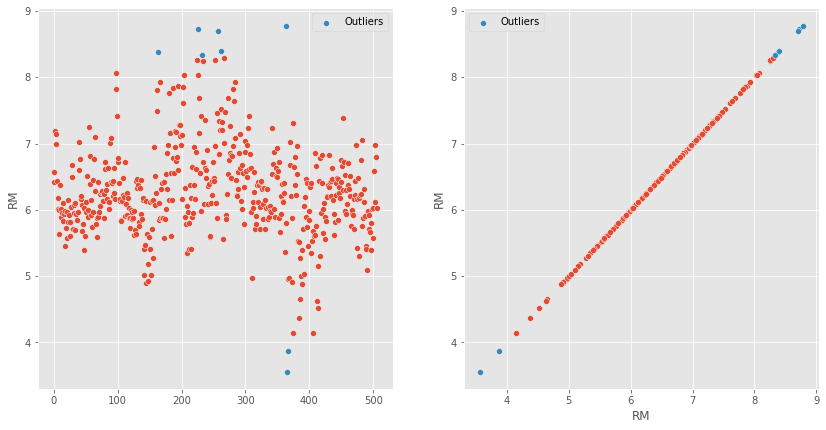

In [82]:
plt.subplots(figsize=(14,7))
plt.subplot(1,2,1)
sns.scatterplot(data = dfb['RM'])
sns.scatterplot(data = dfb['RM'].iloc[idx],label='Outliers')
plt.subplot(1,2,2)
sns.scatterplot(dfb['RM'],dfb['RM'])
sns.scatterplot(dfb['RM'].iloc[idx],dfb['RM'].iloc[idx],label='Outliers')
plt.show();

>**Isolation Forest**


A floresta de isolamento foi o primeiro algoritmo de detecção de anomalias usando a estratégia de isolamento.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Isolating_an_Anomalous_Point.png/300px-Isolating_an_Anomalous_Point.png'>

Esse algoritmo é basicamente uma floresta aleatória em que cada arvore de decisão é cultivada aleatoriamente. 

As arvores irão dividir e subdividir os dados baseado em um valor aleatório de corte até que todos os dados eventualmente estejam todos cortados e separados. Os dados mais discrepantes serão isolados mais rapidamente do que os demais, podendo assim ser identificado como um outlier.









In [83]:
from sklearn.ensemble import IsolationForest
ifr = IsolationForest(n_estimators=250,contamination=0.03)
data = dfb['CRIM'].values.reshape(-1,1)
ifr.fit(data)
out = ifr.predict(data)

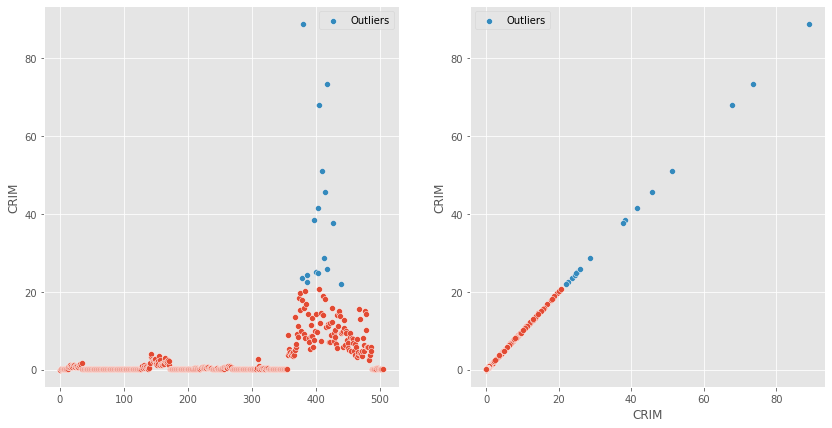

In [85]:
plt.subplots(figsize=(14,7))
plt.subplot(1,2,1)
sns.scatterplot(data = dfb['CRIM'])
sns.scatterplot(data = dfb['CRIM'].iloc[np.where(out == -1)],label='Outliers')

plt.subplot(1,2,2)
sns.scatterplot(dfb['CRIM'],dfb['CRIM'])
sns.scatterplot(dfb['CRIM'].iloc[np.where(out == -1)],dfb['CRIM'].iloc[np.where(out == -1)],label='Outliers')
plt.show();

>**Método de Tukey**

O método de Tukey ou bloxplot consiste em definir os limites inferior e superior a partir do interquartil (IQR) e dos primeiros (Q1) e terceiros (Q3) quartis.



***Mas o que são quartis?***

Quartis são separatrizes que que dividem um conjunto de dados em 4 partes iguais. O objetivo das separatrizes é proporcionar uma melhor idéia da dispersão do conjunto de dados, principalmente da simetria ou assimetria da distribuição. 

O limite inferior é definido pelo primeiro quartil menos o produto entre o valor 1.5 e o 
interquartil.

𝐿𝑖𝑛𝑓 = 𝑄1 − (1.5 ∗ 𝐼𝑄𝑅)

O limite superior é definido pelo terceiro quartil mais o produto entre o valor 1.5 e o 
interquartil.

𝐿𝑠𝑢𝑝 = 𝑄3 + (1.5 ∗ 𝐼𝑄𝑅)




In [86]:
Q3 = dfb['CRIM'].quantile(0.75)
Q1 = dfb['CRIM'].quantile(0.25)

IQR = Q3-Q1

limIn = Q1 - (IQR*1.5)
limSp = Q3 + (IQR*1.5)

idx = np.where((dfb['CRIM'] < limIn) | (dfb['CRIM'] > limSp))

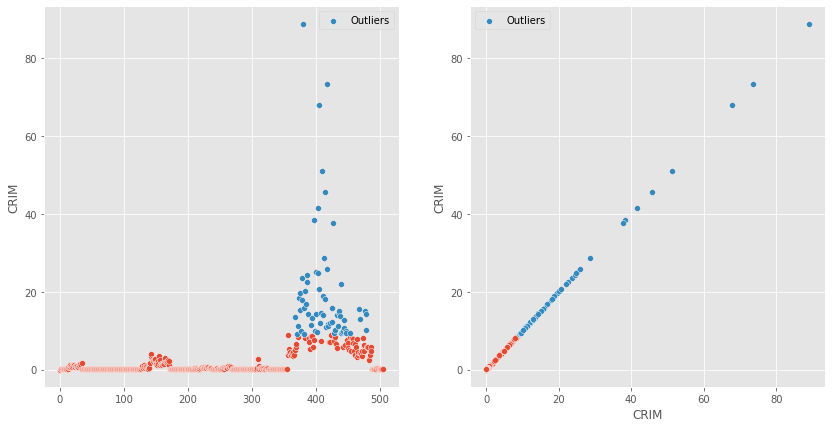

In [88]:
plt.subplots(figsize=(14,7))
plt.subplot(1,2,1)
sns.scatterplot(data = dfb['CRIM'])
sns.scatterplot(data = dfb['CRIM'].iloc[idx],label='Outliers')

plt.subplot(1,2,2)
sns.scatterplot(dfb['CRIM'],dfb['CRIM'])
sns.scatterplot(dfb['CRIM'].iloc[idx],dfb['CRIM'].iloc[idx],label='Outliers')
plt.show();

##**Tratamento de outliers**

In [125]:
path = '/content/drive/MyDrive/GitHub/Tutorials/Outliers/Data/base_training.xlsx'

df = pd.read_excel(path,index_col='DATE') 
df.head()

,Flow
DATE,
2020-01-01 00:00:00,97.467
2020-01-01 01:00:00,89.6492
2020-01-01 02:00:00,91.8057
2020-01-01 03:00:00,85.544
2020-01-01 04:00:00,78.5218


In [126]:
df.describe().T

,count,unique,top,freq
Flow,8784,8706,Bad,60


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Flow    8784 non-null   object
dtypes: object(1)
memory usage: 137.2+ KB


In [128]:
# Retirando os valores de texto 
df = df.apply(lambda x: x.replace('Bad',np.nan))
# Tipando os dados para reais
df = df.astype(float)

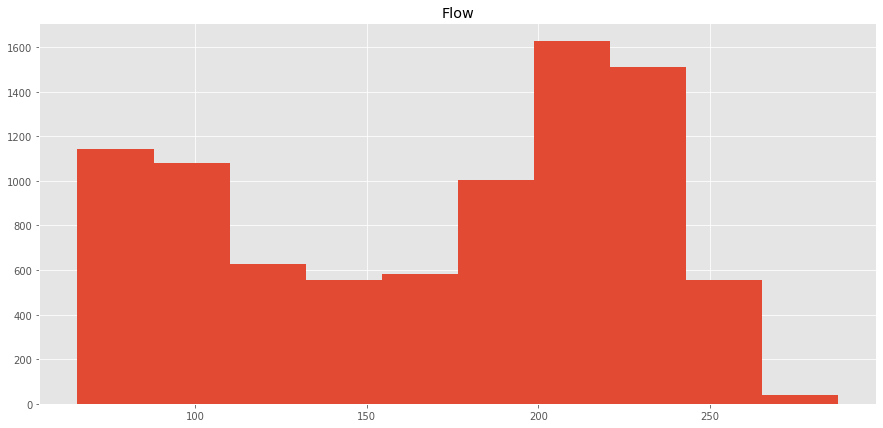

In [129]:
_,ax = plt.subplots(figsize=(15,7))
df.hist(ax=ax)
plt.show()

Para demonstração iremos utilizar uma série histórica de vazão de água.

Podemos observar que nosso dado possui algumas lacunas e dados que aparentemente se mostram discrepantes em nossa análise.

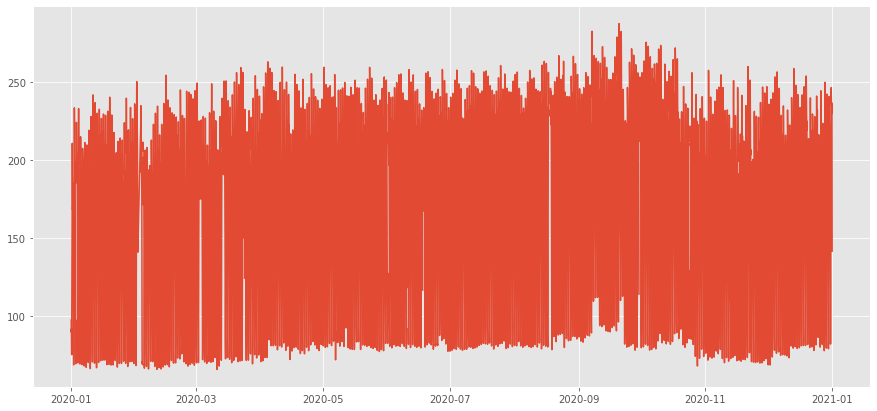

In [130]:
plt.subplots(figsize=(15,7))
plt.plot(df)
plt.show()
comp = df.copy()

Iremos utilizar o método de Tukey para identificar e remover os oltliers e a função KNNImputer da biblioteca scikit-learn para imputar os dados faltantes.

Faremos o tratamento subdividindo a amostra por hora e trimestre.

In [131]:
for h in df.index.hour.unique():
  for q in df.index.quarter.unique():
    aux = df.iloc[(df.index.hour == h) & (df.index.quarter == q)].copy()

    Q3 = aux['Flow'].quantile(0.75)
    Q1 = aux['Flow'].quantile(0.25)

    IQR = Q3-Q1
    limIn = Q1-(IQR*1.5)
    limSp = Q3+(IQR*1.5)

    aux.loc[(df['Flow'] < limIn) | (df['Flow'] > limSp)] = np.nan

    imputer = KNNImputer(n_neighbors=15, weights='uniform', metric='nan_euclidean')
    imputer.fit(aux)

    aux.iloc[:,0] = imputer.transform(aux)

    df.iloc[(df.index.hour == h) & (df.index.quarter == q)] = aux.values


Pronto! Nosso dado está tratado e agora será possível analisar e tirar conclusões melhores sobre a amostra.

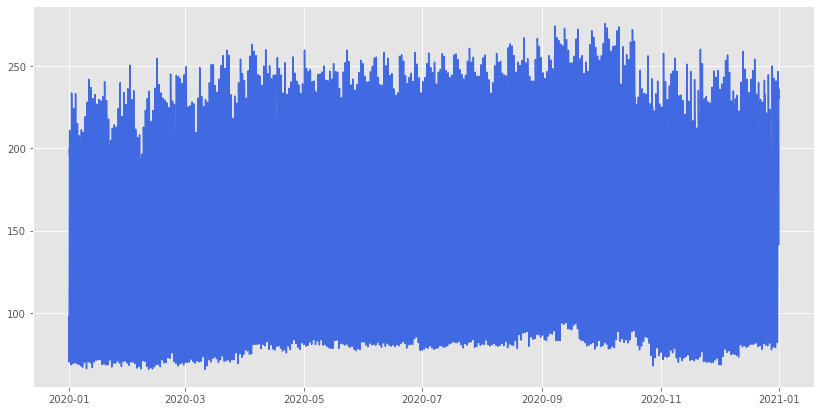

In [132]:
plt.subplots(figsize=(14,7))
plt.plot(df,color='#4169E1')
plt.show()

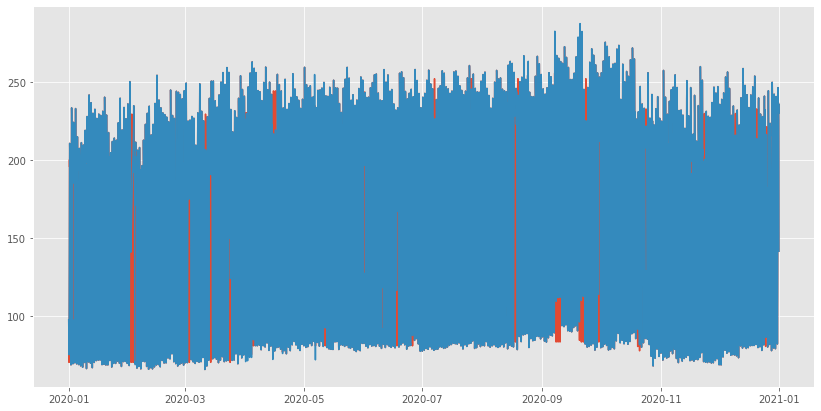

In [133]:
plt.subplots(figsize=(14,7))
plt.plot(df)
plt.plot(comp)
plt.show()